In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b>Calculation of predicted y(ŷ)</b>

In [2]:
def f(x,w1,w2):
    yhat = w1+w2*x
    return yhat

<b> Calculation of derivative of cost function w.r.t w1(bias)</b>

In [3]:
def dx_w1(y,x,w1,w2):
    yhat = f(x,w1,w2)
    diff = (yhat - y)
    return 2*diff

<b>Calculation of derivative of cost function w.r.t w2(weight)</b>

In [4]:
def dx_w2(y,x,w1,w2):
    yhat = f(x,w1,w2)
    diff = (yhat-y)
    return 2*x*diff

<b>Calculating cumulative sum of derivatives(slopes) of w1(bias) for all pairs of x and y</b>

In [5]:
def gradient_w1(xs,ys,w1,w2):
    N = len(xs)
    total = 0
    for i in range(N):
        total+=dx_w1(ys[i],xs[i], w1,w2)
    return total/N

<b>Calculating cumulative sum of derivatives(slopes) of w2(weight) for all pairs of x and y</b>

In [6]:
def gradient_w2(xs,ys,w1,w2):
    N = len(xs)
    total = 0
    for i in range(N):
        total+=dx_w2(ys[i],xs[i], w1,w2)
    return total/N

<b>Iterating lr distance in direction opposite to mean of slopes so as to reach local minima</b>

In [7]:
def gradient_descent(xs,ys,lr=0.01,epochs=15000):
    w1, w2 = 0.03, 0.1
    N = len(xs)
    for i in range(epochs):
        yhat = xs*w2 + w1
        cost = sum([value**2 for value in (yhat-ys)])*(1/N)
        w1 -= lr*gradient_w1(xs,ys,w1,w2)
        w2 -= lr*gradient_w2(xs,ys,w1,w2)
        if i%1000==0:
            print(f"w1: {w1} w2: {w2} cost: {cost} epoch: {i}")
    return w1,w2

<b>Stochastic Gradient descent (no batch training)</b>

In [8]:
def sgd(xs,ys,lr=0.01,epochs=10000):
    w1, w2 = 0.03, 0.1
    N = len(xs)
    for i in range(epochs):
        for j in range(N):
            yhat = xs*w2 + w1
            cost = sum([value**2 for value in (yhat-ys)])*(1/N)
            w1 -= lr*dx_w1(xs[j],ys[j],w1,w2)
            w2 -= lr*dx_w2(xs[j],ys[j],w1,w2)
            if i%1000==0:
                print(f"w1: {w1} w2: {w2} cost: {cost} epoch: {i}")
    return w1,w2

<b>Placeholder input line to test model</b>

In [9]:
xs = np.array([1,2,3,4,5,6,7,8,9,10])
ys = np.array([5,7,9,11,13,15,17,19,21,23])

w1,w2 = gradient_descent(xs,ys)


w1: 0.2984 w2: 1.8601760000000003 cost: 209.87890000000004 epoch: 0
w1: 2.9634511674507285 w2: 2.0052279514411593 cost: 0.0002887060017728562 epoch: 1000
w1: 2.999491380423863 w2: 2.000072753033698 cost: 5.591070097004386e-08 epoch: 2000
w1: 2.9999929219661716 w2: 2.000001012443205 cost: 1.0827646333985848e-11 epoch: 3000
w1: 2.9999999015009133 w2: 2.0000000140893266 cost: 2.0968782088070516e-15 epoch: 4000
w1: 2.99999999862927 w2: 2.0000000001960694 cost: 4.060809987936111e-19 epoch: 5000
w1: 2.999999999980924 w2: 2.0000000000027285 cost: 7.864760303986785e-23 epoch: 6000
w1: 2.9999999999997367 w2: 2.0000000000000377 cost: 1.5073317518691528e-26 epoch: 7000
w1: 2.9999999999999405 w2: 2.000000000000009 cost: 7.448424667096794e-28 epoch: 8000
w1: 2.9999999999999405 w2: 2.000000000000009 cost: 7.448424667096794e-28 epoch: 9000
w1: 2.9999999999999405 w2: 2.000000000000009 cost: 7.448424667096794e-28 epoch: 10000
w1: 2.9999999999999405 w2: 2.000000000000009 cost: 7.448424667096794e-28 epoc

Plotting actual vs predicted lines

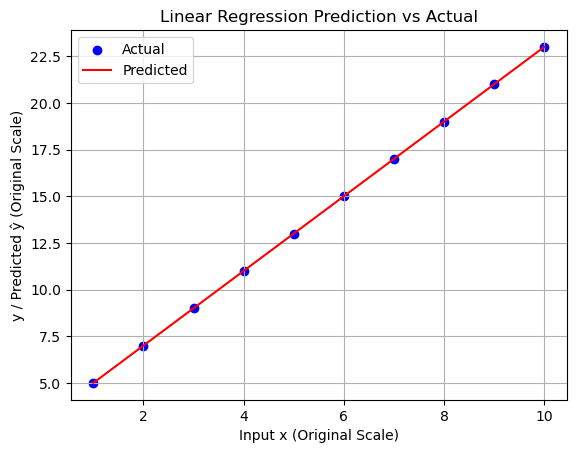

In [10]:
xorg = xs                
yhat = w1 + w2 * xs                        
yhat_original = yhat  
plt.scatter(xorg, ys, label="Actual", color="blue")
plt.plot(xorg, yhat_original, color="red", label="Predicted")

plt.xlabel("Input x (Original Scale)")
plt.ylabel("y / Predicted ŷ (Original Scale)")
plt.title("Linear Regression Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.show()


<b>Accuracy Statistics</b>

In [11]:
print("ACCURACY STATISTICS")
ssr = sum([value**2 for value in (w1+w2*xs - ys)])
N = len(ys)
meany = (1/N)*sum([y for y in ys])
sst = sum([value**2 for value in (ys-meany)])
r2 = 1-(ssr/sst)

print(f"R-squared is: {r2}")
print(f"Mean squared error is: {ssr/N}")

ACCURACY STATISTICS
R-squared is: 1.0
Mean squared error is: 7.448424667096794e-28


<b>EXAMPLE DATASET FOR UNIVARIATE LINEAR REGRESSION</b>

In [12]:
import os
filepath = r"./archive2/Salary_dataset.csv"
ys = []
xs = []
with open(filepath, "r") as file:
    for row in file:
        vals = row.strip().split(',')
        try:
            xs.append(float(vals[0]))
            ys.append(float(vals[1]))
        except (ValueError, IndexError):
            continue
print(xs, ys)
xs = np.array(xs)
ys = np.array(ys)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] [1.2000000000000002, 1.4000000000000001, 1.6, 2.1, 2.3000000000000003, 3.0, 3.1, 3.3000000000000003, 3.3000000000000003, 3.8000000000000003, 4.0, 4.1, 4.1, 4.199999999999999, 4.6, 5.0, 5.199999999999999, 5.3999999999999995, 6.0, 6.1, 6.8999999999999995, 7.199999999999999, 8.0, 8.299999999999999, 8.799999999999999, 9.1, 9.6, 9.7, 10.4, 10.6]


<h1>Scaling the variables into normalised(Gaussian) form</h1>
<b>Scaling variables into normalised form (0,1) helps eliminate the noise and helps make better predictions</b>

In [13]:
xs_mean = xs.mean()
xs_std = xs.std()
ys_mean = ys.mean()
ys_std = ys.std()

xs = (xs - xs_mean) / xs_std
ys = (ys - ys_mean) / ys_std

w1,w2 = gradient_descent(xs,ys,lr=0.0008,epochs=10000)
print(w1,w2)

w1: 0.029952 w2: 0.10141833664504585 cost: 0.813607919369269 epoch: 0
w1: 0.006039460781173705 w2: 0.8080023085233313 cost: 0.05888191307950265 epoch: 1000
w1: 0.0012177846730549345 w2: 0.9504764734126429 cost: 0.028196357429949914 epoch: 2000
w1: 0.00024555164172132554 w2: 0.9792046762431523 cost: 0.026948747942964434 epoch: 3000
w1: 4.951253705717246e-05 w2: 0.984997373034969 cost: 0.026898022792349815 epoch: 4000
w1: 9.983607964105475e-06 w2: 0.9861654007156379 cost: 0.02689596041551497 epoch: 5000
w1: 2.01307454465645e-06 w2: 0.9864009194579152 cost: 0.026895876563655368 epoch: 6000
w1: 4.0591228531414847e-07 w2: 0.9864484089813941 cost: 0.02689587315441691 epoch: 7000
w1: 8.18473335832425e-08 w2: 0.986457984672986 cost: 0.026895873015804546 epoch: 8000
w1: 1.6503531280784797e-08 w2: 0.9864599154960975 cost: 0.026895873010168863 epoch: 9000
3.3330718844688636e-09 0.9864603046657888


<h1>Plotting actual v/s predicted curves</h1>

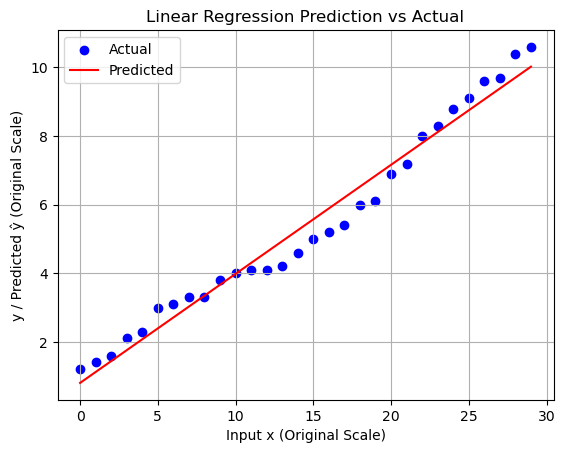

In [14]:
xorg = xs * xs_std + xs_mean               
yhat = w1 + w2 * xs                        
yhat_original = yhat * ys_std + ys_mean   
plt.scatter(xorg, ys * ys_std + ys_mean, label="Actual", color="blue")
plt.plot(xorg, yhat_original, color="red", label="Predicted")

plt.xlabel("Input x (Original Scale)")
plt.ylabel("y / Predicted ŷ (Original Scale)")
plt.title("Linear Regression Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.show()


<h2>Accuracy statistics of the model</h2>

In [15]:
print("ACCURACY STATISTICS")
yhat = w1+w2*xs
yhat_original = yhat * ys_std + ys_mean
ssr = sum([value**2 for value in (w1+w2*xs - ys)])
N = len(ys)
meany = (1/N)*sum([y for y in ys])
sst = sum([value**2 for value in (ys-meany)])
r2 = 1-(ssr/sst)

print(f"R-squared is: {r2}")
print(f"Mean squared error is: {ssr/N}")

ACCURACY STATISTICS
R-squared is: 0.9731041269900603
Mean squared error is: 0.026895873009939723


<h1>Using stochastic gradient descent to check performance of model</h1>

In [16]:

w1,w2 = sgd(xs,ys,lr=0.0008,epochs=10000)
print(w1,w2)

w1: 0.027513213698550667 w2: 0.10374917066794885 cost: 0.813607919369269 epoch: 0
w1: 0.025212420641135717 w2: 0.10705327471913918 cost: 0.8068319698943849 epoch: 0
w1: 0.02309549004062855 w2: 0.10994184085507103 cost: 0.8008884367059551 epoch: 0
w1: 0.02114159539111836 w2: 0.11225836695838132 cost: 0.7957140647241219 epoch: 0
w1: 0.019367208524072557 w2: 0.11423508561371619 cost: 0.791572040153573 epoch: 0
w1: 0.017738189826530647 w2: 0.11564182713279142 cost: 0.7880479663335905 epoch: 0
w1: 0.016291947815764776 w2: 0.11683898138820867 cost: 0.7855355087312551 epoch: 0
w1: 0.015021062714145751 w2: 0.11780002969244988 cost: 0.7834027177669166 epoch: 0
w1: 0.013938230501550476 w2: 0.11861887166358222 cost: 0.7816923497567512 epoch: 0
w1: 0.013008967684639584 w2: 0.11915532702712983 cost: 0.7802390710584778 epoch: 0
w1: 0.01225287716548169 w2: 0.11953770187678744 cost: 0.7792832013249862 epoch: 0
w1: 0.01167630635805388 w2: 0.1198086577329225 cost: 0.7786009759979418 epoch: 0
w1: 0.01128

<h1>Almost similar to gradient descent but worse by a very small amount</h1>

In [17]:
print("ACCURACY STATISTICS")
yhat = w1+w2*xs
yhat_original = yhat * ys_std + ys_mean
ssr = sum([value**2 for value in (w1+w2*xs - ys)])
N = len(ys)
meany = (1/N)*sum([y for y in ys])
sst = sum([value**2 for value in (ys-meany)])
r2 = 1-(ssr/sst)

print(f"R-squared is: {r2}")
print(f"Mean squared error is: {ssr/N}")

ACCURACY STATISTICS
R-squared is: 0.9730999611198116
Mean squared error is: 0.02690003888018847
